In [1]:
import scicm
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plot
from matplotlib.colors import LightSource

%matplotlib inline

# Isoluminants and relief shading

In [19]:
def asinh_stretch(x,a=0.1):
    y=np.arcsinh(x/a)
    y/=np.arcsinh(1/a)
    return(y)

In [99]:
#water_pressure0=np.loadtxt('data/Data_AusWeather_9AMvapourpressure_251221.dat')
#water_pressure1=np.loadtxt('data/Data_AusWeather_3PMvapourpressure_251221.dat')
f450w_file=fits.open('data/hst_09042_84_wfpc2_f450w_wf_drz.fits')
f450w=-2.5*np.log10(f450w_file[1].data[650:1650,600:1600])
f450w_file.close()
f814w_file=fits.open('data/hst_09042_84_wfpc2_f814w_wf_drz.fits')
f814w=-2.5*np.log10(f814w_file[1].data[650:1650,600:1600])
f814w_file.close()

f450w=np.where(np.isinf(f450w),np.nan,f450w)
f450w-=np.nanmin(f450w)
f450w/=np.nanmax(f450w)

f814w=np.where(np.isinf(f814w),np.nan,f814w)
f814w-=np.nanmin(f814w)
f814w/=np.nanmax(f814w)

<ipython-input-99-61e0d9527d42>:4: RuntimeWarning: divide by zero encountered in log10
  f450w=-2.5*np.log10(f450w_file[1].data[650:1650,600:1600])
<ipython-input-99-61e0d9527d42>:4: RuntimeWarning: invalid value encountered in log10
  f450w=-2.5*np.log10(f450w_file[1].data[650:1650,600:1600])
<ipython-input-99-61e0d9527d42>:7: RuntimeWarning: divide by zero encountered in log10
  f814w=-2.5*np.log10(f814w_file[1].data[650:1650,600:1600])
<ipython-input-99-61e0d9527d42>:7: RuntimeWarning: invalid value encountered in log10
  f814w=-2.5*np.log10(f814w_file[1].data[650:1650,600:1600])


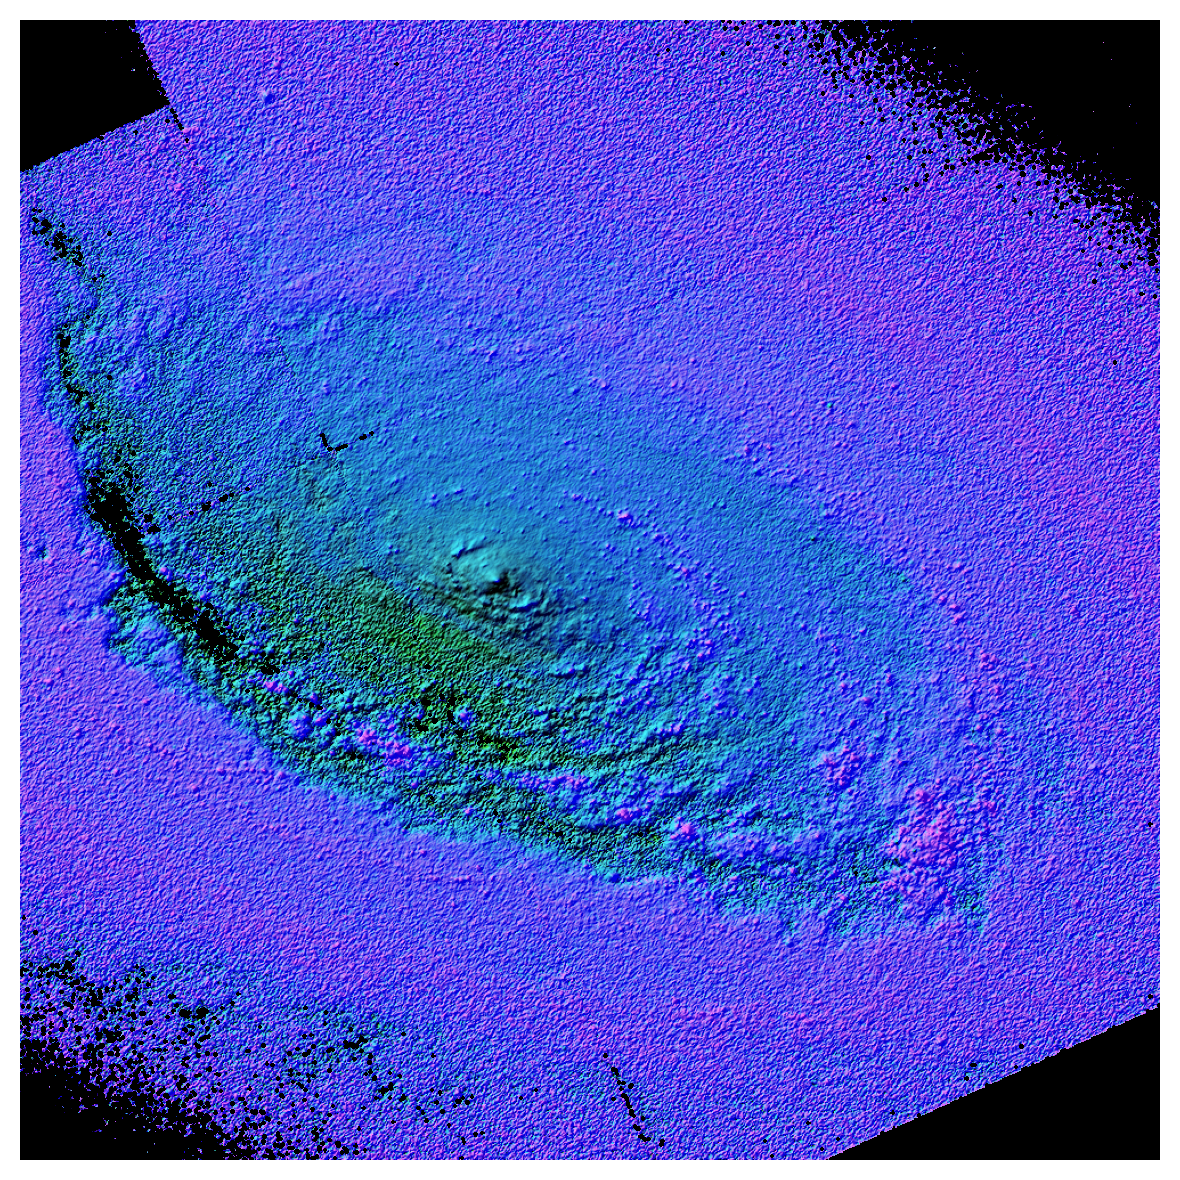

In [114]:
f450w_f814w=f450w-f814w
f450w_f814w=np.where(f450w_f814w>0.18,0.18,f450w_f814w)
f450w_f814w=np.where(f450w_f814w<0.05,0.05,f450w_f814w)
f450w_f814w-=np.nanmin(f450w_f814w)
f450w_f814w/=np.nanmax(f450w_f814w)

ls=LightSource(azdeg=315,altdeg=30)
rgb=ls.shade_rgb(scicm.cm.iso_1(f450w_f814w)[:,:,:3],
                 1-f450w,blend_mode='overlay',vert_exag=100)

plot.figure(figsize=(6,6),dpi=200)
plot.imshow(rgb)
plot.axis('off')
plot.tight_layout()
plot.savefig('test.png')
plot.show()